<a href="https://colab.research.google.com/github/Shashwat-143/Stock-Market-Prediction-And-Forecasting-Using-Stacked-LSTM/blob/main/Stock_Market_Prediction_And_Forecasting_Using_Stacked_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stock Market Prediction And Forecasting Using Stacked LSTM**

Because financial capital markets are unpredictable and non-linear, projecting stock market returns may be difficult. Greater use of artificial intelligence and computers programmable techniques for forecasting market values have turned out to be more accurate in the new era that electricity has brought forth. An accurate forecast of a stock's future price will provide a sizable profit. To make prediction more dependable and straightforward, we have suggested a deep learning-based methodology. the application of the Long Short Term Memory algorithm (LSTM), a sophisticated recurrent neural network. We used multi-layer LSTM networks to estimate the future close prices of stock data and tested the accuracy of our model using stacked Long Short Term Memory. Following the trial, we were able to predict the closing price of the supplied stock for the next 10 days.

In [1]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
import numpy as np
import math
warnings.filterwarnings('ignore')

In [4]:
Data = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [5]:
Data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [7]:
Data.describe

<bound method NDFrame.describe of             Date    Open    High     Low    Last   Close  \
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                  3069914          7162.35  
1                  5082859         11859.95  
2                  2240909          5248.60  
3                  2349368          5503.90  
4              

In [9]:
Data['Date'] = pd.to_datetime(d['Date'])
Data.dtypes

Date                    datetime64[ns]
Open                           float64
High                           float64
Low                            float64
Last                           float64
Close                          float64
Total Trade Quantity             int64
Turnover (Lacs)                float64
dtype: object

In [10]:
Data = d.sort_values('Date')

In [11]:
Data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


Text(0, 0.5, 'Close')

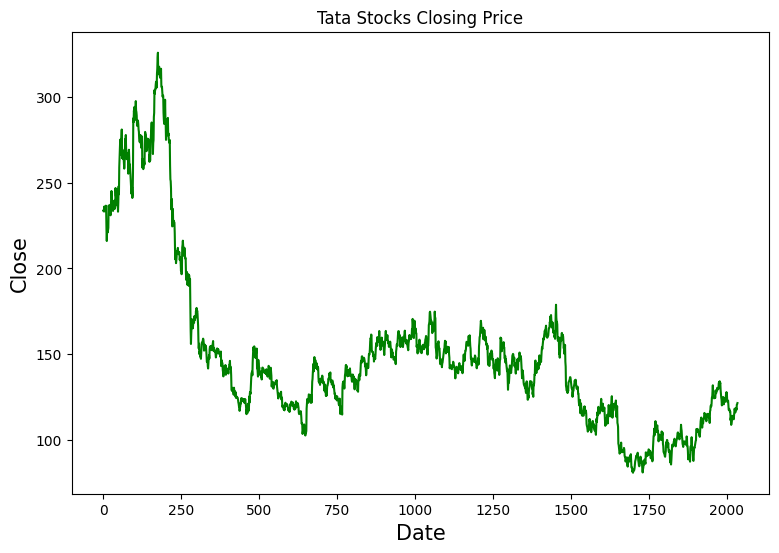

In [12]:
plt.figure(figsize = (9,6))
plt.title('Tata Stocks Closing Price')
plt.plot(d['Close'],'g')
plt.xlabel('Date',fontsize=15)
plt.ylabel('Close',fontsize=15)

<Axes: >

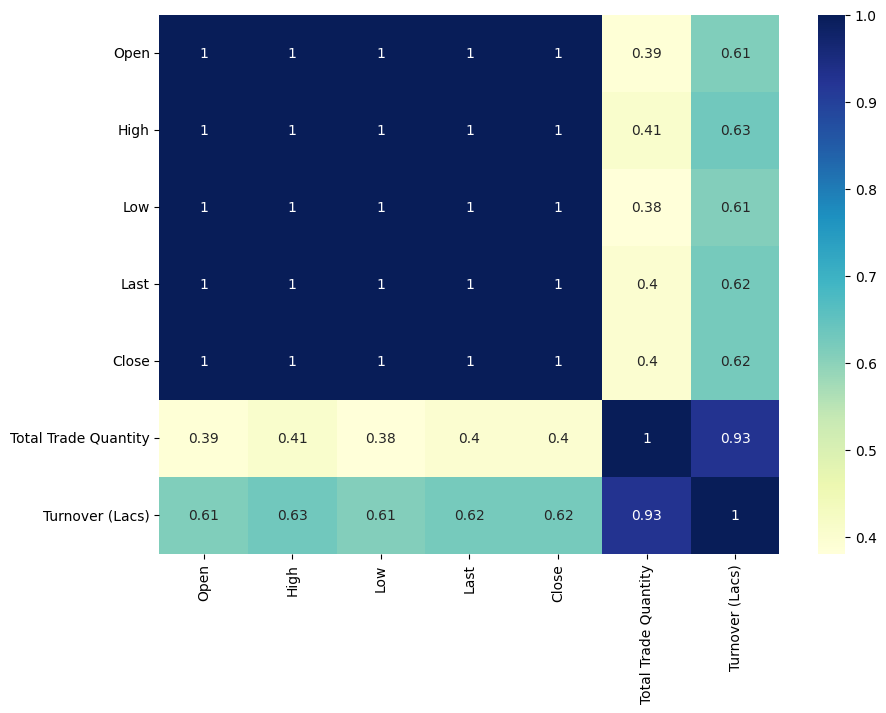

In [13]:
dcorr = d.corr()
top_corr_features = dcorr.index
plt.figure(figsize=(10,7))
sns.heatmap(d[top_corr_features].corr(), annot=True, cmap="YlGnBu")

In [14]:
data_close = d.reset_index()['Close']
data_close.head()
scaler = MinMaxScaler(feature_range = (0, 1))
data_close = scaler.fit_transform(np.array(data_close).reshape(-1, 1))

In [17]:
train_size = int(len(data_close)*0.70)
test_size = len(data_close) - train_size
train, test = data_close[0 : train_size, :], data_close[train_size : len(data_close), :1]

In [18]:
def create_matrix(ds, time_step=1):
    dataX, dataY = [], []
    for i in range(len(ds)-time_step-1):
        a = ds[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(ds[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [19]:
step=100
X_train, y_train = create_matrix(train, step)
X_test, y_test = create_matrix(test, step)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1323, 100) (1323,)
(510, 100) (510,)


In [20]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [21]:
m = Sequential()
m.add(LSTM(50, return_sequences=True,input_shape=(100,1)))
m.add(LSTM(50,return_sequences=True))
m.add(LSTM(50))
m.add(Dense(1))
m.compile(loss='mean_squared_error',optimizer='adam')

In [22]:
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = m.fit(X_train, y_train, validation_split=0.1, epochs=77, batch_size=64, verbose=1, shuffle=True).history

Epoch 1/77
19/19 [==============================] - 18s 563ms/step - loss: 0.0230 - val_loss: 0.0015
Epoch 2/77
19/19 [==============================] - 6s 319ms/step - loss: 0.0028 - val_loss: 0.0011
Epoch 3/77
19/19 [==============================] - 7s 363ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 4/77
19/19 [==============================] - 5s 267ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 5/77
19/19 [==============================] - 6s 315ms/step - loss: 0.0015 - val_loss: 9.7109e-04
Epoch 6/77
19/19 [==============================] - 4s 221ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 7/77
19/19 [==============================] - 5s 277ms/step - loss: 0.0014 - val_loss: 9.2292e-04
Epoch 8/77
19/19 [==============================] - 7s 367ms/step - loss: 0.0013 - val_loss: 8.8957e-04
Epoch 9/77
19/19 [==============================] - 5s 251ms/step - loss: 0.0013 - val_loss: 8.2713e-04
Epoch 10/77
19/19 [==============================] - 5s 271ms/step - loss: 0.0013 -

In [25]:
train_predict = m.predict(X_train)
test_predict = m.predict(X_test)

16/16 [==============================] - 1s 46ms/step


In [26]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [27]:
math.sqrt(mean_squared_error(y_train, train_predict))
math.sqrt(mean_squared_error(y_test,test_predict))

109.11172926936734

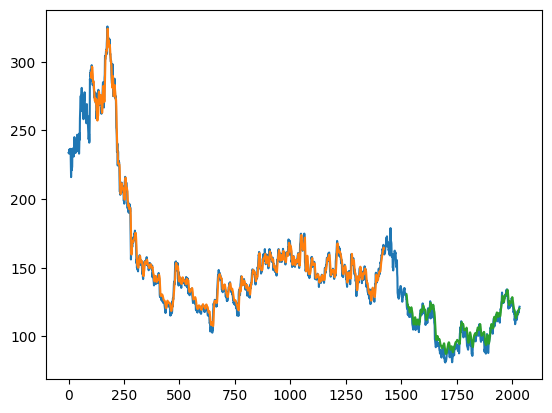

In [28]:
look_back = 100
train_num_pyredict_plot = np.empty_like(data_close)
train_num_pyredict_plot[:, :] = np.nan
train_num_pyredict_plot[look_back : len(train_predict) + look_back, :] = train_predict
test_predict_plot = np.empty_like(data_close)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (look_back * 2) + 1 : len(data_close) - 1, :] = test_predict
plt.plot(scaler.inverse_transform(data_close))
plt.plot(train_num_pyredict_plot)
plt.plot(test_predict_plot)
plt.show()

In [29]:
x_inum_pyut=test[307:].reshape(1, -1)
x_inum_pyut.shape
temp_inum_pyut = list(x_inum_pyut)
temp_inum_pyut = temp_inum_pyut[0].tolist()
temp_inum_pyut = list(x_inum_pyut)
temp_inum_pyut = temp_inum_pyut[0].tolist()

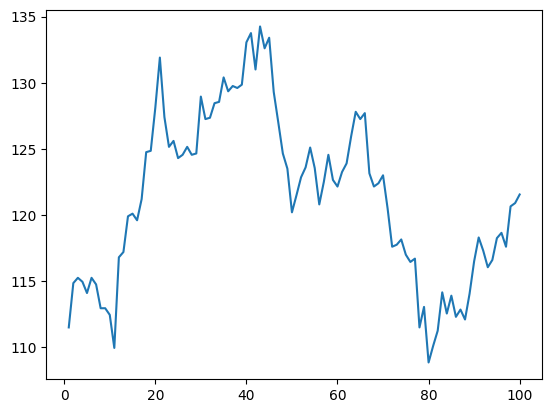

In [30]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)
plt.plot(day_new, scaler.inverse_transform(data_close[1935 : ]))